In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [2]:
df = pd.read_csv("train.csv")
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df = df.drop(['PassengerId','Ticket','Cabin','Fare','Name','Embarked'],axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [5]:
df.dropna(inplace=True)

In [6]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
885,0,3,female,39.0,0,5
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
889,1,1,male,26.0,0,0


In [7]:
grpByPclass = df.groupby(['Survived','Pclass'])
grpByPclass = grpByPclass.groups
grpByPclass

{(0, 1): [6, 27, 30, 34, 35, 54, 62, 83, 92, 96, 102, 110, 118, 124, 137, 139, 155, 170, 174, 177, 245, 252, 262, 263, 273, 297, 331, 332, 336, 339, 373, 377, 434, 438, 452, 456, 462, 467, 487, 492, 493, 498, 505, 515, 536, 544, 545, 555, 583, 625, 659, 662, 671, 694, 698, 741, 745, 748, 782, 789, 806, 822, 867, 872], (0, 2): [20, 33, 41, 70, 72, 99, 117, 120, 122, 134, 135, 144, 145, 148, 149, 150, 178, 191, 199, 213, 217, 219, 221, 228, 232, 234, 236, 238, 239, 242, 249, 265, 292, 308, 312, 314, 317, 342, 343, 344, 357, 361, 385, 397, 398, 405, 418, 439, 450, 463, 476, 529, 551, 562, 582, 586, 594, 619, 626, 637, 655, 658, 665, 666, 672, 684, 685, 695, 705, 714, 722, 723, 728, 733, 734, 757, 772, 791, 795, 800, 808, 812, 817, 841, 848, 854, 861, 864, 883, 886], (0, 3): [0, 4, 7, 12, 13, 14, 16, 18, 24, 37, 38, 40, 49, 50, 51, 57, 59, 60, 63, 67, 69, 71, 73, 75, 80, 86, 89, 90, 91, 93, 94, 100, 103, 104, 105, 108, 111, 112, 113, 114, 115, 116, 119, 129, 130, 131, 132, 138, 143, 147, 1

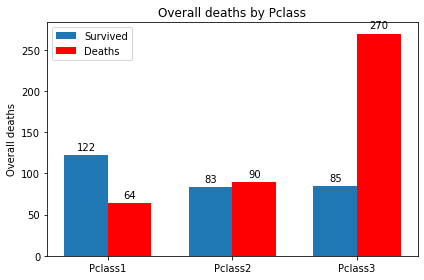

In [8]:
labels = ['Pclass1','Pclass2','Pclass3']
dead = [len(grpByPclass[(0,1)]),len(grpByPclass[(0,2)]),len(grpByPclass[(0,3)])]
survived = [len(grpByPclass[(1,1,)]),len(grpByPclass[(1,2,)]),len(grpByPclass[(1,3,)])]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, survived, width, label='Survived')
rects2 = ax.bar(x + width/2, dead, width, label='Deaths',color = 'red')

ax.set_ylabel('Overall deaths')
ax.set_title('Overall deaths by Pclass')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [9]:
grpBySex = df.groupby(['Survived','Sex'])
grpBySex = grpBySex.groups
grpBySex

{(0, 'female'): [14, 18, 24, 38, 40, 41, 49, 71, 100, 111, 113, 114, 119, 132, 147, 167, 177, 199, 205, 246, 251, 254, 276, 293, 297, 312, 357, 362, 374, 396, 402, 404, 419, 423, 436, 474, 498, 501, 503, 534, 541, 542, 567, 610, 617, 634, 638, 642, 654, 657, 678, 702, 729, 736, 767, 772, 799, 807, 813, 816, 852, 854, 882, 885], (0, 'male'): [0, 4, 6, 7, 12, 13, 16, 20, 27, 30, 33, 34, 35, 37, 50, 51, 54, 57, 59, 60, 62, 63, 67, 69, 70, 72, 73, 75, 80, 83, 86, 89, 90, 91, 92, 93, 94, 96, 99, 102, 103, 104, 105, 108, 110, 112, 115, 116, 117, 118, 120, 122, 124, 129, 130, 131, 134, 135, 137, 138, 139, 143, 144, 145, 148, 149, 150, 152, 153, 155, 157, 160, 162, 163, 164, 169, 170, 171, 173, 174, 175, 178, 179, 182, 188, 189, 191, 197, 200, 202, 203, 206, 210, 212, 213, 217, 219, 221, 222, 225, ...], (1, 'female'): [1, 2, 3, 8, 9, 10, 11, 15, 22, 25, 39, 43, 44, 52, 53, 56, 58, 61, 66, 68, 79, 84, 85, 88, 98, 106, 123, 133, 136, 141, 142, 151, 156, 161, 172, 184, 190, 192, 194, 195, 208, 21

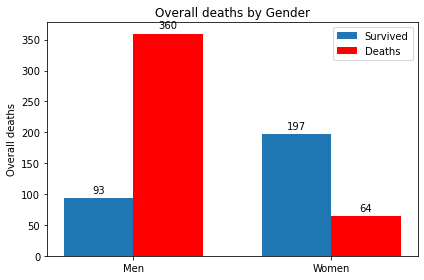

In [10]:
labels = ['Men','Women']
dead = [len(grpBySex[(0,'male')]),len(grpBySex[(0,'female')])]
survived = [len(grpBySex[(1,'male')]),len(grpBySex[(1,'female')])]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, survived, width, label='Survived')
rects2 = ax.bar(x + width/2, dead, width, label='Deaths',color = 'red')

ax.set_ylabel('Overall deaths')
ax.set_title('Overall deaths by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [11]:
grpBySexNPclass = df.groupby(['Pclass','Sex'])
grpBySexNPclass = grpBySexNPclass.groups
grpBySexNPclass

{(1, 'female'): [1, 3, 11, 52, 61, 88, 136, 151, 177, 194, 195, 215, 218, 230, 257, 258, 268, 269, 275, 290, 291, 297, 299, 307, 309, 310, 311, 318, 319, 325, 329, 337, 341, 356, 366, 369, 380, 383, 393, 412, 435, 486, 496, 498, 504, 513, 520, 523, 537, 539, 540, 556, 558, 571, 577, 581, 585, 591, 609, 627, 641, 689, 700, 708, 710, 716, 730, 742, 759, 763, 765, 779, 781, 796, 809, 820, 829, 835, 842, 853, 856, 862, 871, 879, 887], (1, 'male'): [6, 23, 27, 30, 34, 35, 54, 62, 83, 92, 96, 97, 102, 110, 118, 124, 137, 139, 155, 170, 174, 187, 209, 224, 245, 248, 252, 262, 263, 273, 305, 331, 332, 336, 339, 370, 373, 377, 390, 430, 434, 438, 445, 447, 449, 452, 453, 456, 460, 462, 467, 484, 487, 492, 493, 505, 512, 515, 536, 544, 545, 550, 555, 572, 583, 587, 599, 604, 607, 621, 625, 630, 632, 645, 647, 659, 660, 662, 671, 679, 681, 690, 694, 698, 701, 707, 712, 724, 737, 741, 745, 748, 782, 789, 802, 806, 822, 857, 867, 872, ...], (2, 'female'): [9, 15, 41, 43, 53, 56, 58, 66, 84, 98, 123

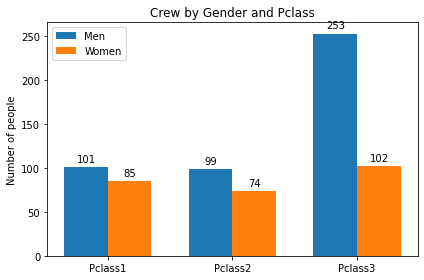

In [12]:
labels = ['Pclass1','Pclass2','Pclass3']
male = [len(grpBySexNPclass[(1,'male')]),len(grpBySexNPclass[(2,'male')]),len(grpBySexNPclass[(3,'male')])]
female = [len(grpBySexNPclass[(1,'female')]),len(grpBySexNPclass[(2,'female')]),len(grpBySexNPclass[(3,'female')])]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male, width, label='Men')
rects2 = ax.bar(x + width/2, female, width, label='Women')

ax.set_ylabel('Number of people')
ax.set_title('Crew by Gender and Pclass')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [13]:
grpBySexNPclassNDeaths = df.groupby(['Pclass','Sex','Survived'])
grpBySexNPclassNDeaths = grpBySexNPclassNDeaths.groups
grpBySexNPclassNDeaths

{(1, 'female', 0): [177, 297, 498], (1, 'female', 1): [1, 3, 11, 52, 61, 88, 136, 151, 194, 195, 215, 218, 230, 257, 258, 268, 269, 275, 290, 291, 299, 307, 309, 310, 311, 318, 319, 325, 329, 337, 341, 356, 366, 369, 380, 383, 393, 412, 435, 486, 496, 504, 513, 520, 523, 537, 539, 540, 556, 558, 571, 577, 581, 585, 591, 609, 627, 641, 689, 700, 708, 710, 716, 730, 742, 759, 763, 765, 779, 781, 796, 809, 820, 829, 835, 842, 853, 856, 862, 871, 879, 887], (1, 'male', 0): [6, 27, 30, 34, 35, 54, 62, 83, 92, 96, 102, 110, 118, 124, 137, 139, 155, 170, 174, 245, 252, 262, 263, 273, 331, 332, 336, 339, 373, 377, 434, 438, 452, 456, 462, 467, 487, 492, 493, 505, 515, 536, 544, 545, 555, 583, 625, 659, 662, 671, 694, 698, 741, 745, 748, 782, 789, 806, 822, 867, 872], (1, 'male', 1): [23, 97, 187, 209, 224, 248, 305, 370, 390, 430, 445, 447, 449, 453, 460, 484, 512, 550, 572, 587, 599, 604, 607, 621, 630, 632, 645, 647, 660, 679, 681, 690, 701, 707, 712, 724, 737, 802, 857, 889], (2, 'female', 

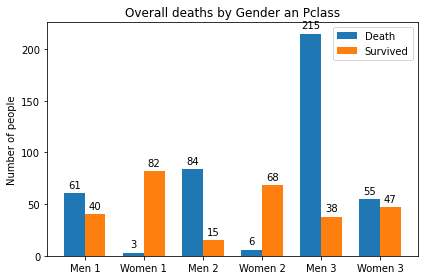

In [14]:
labels = ['Men 1','Women 1','Men 2','Women 2','Men 3','Women 3']
Death = [len(grpBySexNPclassNDeaths[(1,'male',0)]),len(grpBySexNPclassNDeaths[(1,'female',0)]),len(grpBySexNPclassNDeaths[(2,'male',0)]),len(grpBySexNPclassNDeaths[(2,'female',0)]),len(grpBySexNPclassNDeaths[(3,'male',0)]),len(grpBySexNPclassNDeaths[(3,'female',0)]),]
Survived = [len(grpBySexNPclassNDeaths[(1,'male',1)]),len(grpBySexNPclassNDeaths[(1,'female',1)]),len(grpBySexNPclassNDeaths[(2,'male',1)]),len(grpBySexNPclassNDeaths[(2,'female',1)]),len(grpBySexNPclassNDeaths[(3,'male',1)]),len(grpBySexNPclassNDeaths[(3,'female',1)]),]



x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Death, width, label='Death')

rects2 = ax.bar(x + width/2, Survived, width, label='Survived')

ax.set_ylabel('Number of people')
ax.set_title('Overall deaths by Gender an Pclass')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [15]:
df = pd.get_dummies(df)
df

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,1,0
2,1,3,26.0,0,0,1,0
3,1,1,35.0,1,0,1,0
4,0,3,35.0,0,0,0,1
...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,1,0
886,0,2,27.0,0,0,0,1
887,1,1,19.0,0,0,1,0
889,1,1,26.0,0,0,0,1


<BarContainer object of 3 artists>

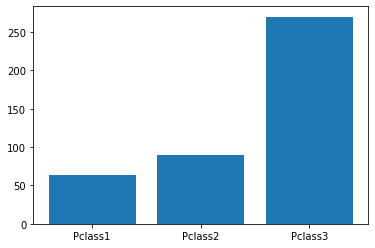

In [16]:
mortes = df.groupby(['Pclass','Survived']).groups
labels2 = ['Pclass1','Pclass2','Pclass3']
lista_morto = [len(mortes[(1,0)]),len(mortes[(2,0)]),len(mortes[(3,0)])]
plt.bar(labels2,lista_morto)

In [17]:
min_max = preprocessing.MinMaxScaler()
fit = min_max.fit_transform(df)
df = pd.DataFrame(fit)
df

,0,1,2,3,4,5,6
0,0.0,1.0,0.271174,0.2,0.000000,0.0,1.0
1,1.0,0.0,0.472229,0.2,0.000000,1.0,0.0
2,1.0,1.0,0.321438,0.0,0.000000,1.0,0.0
3,1.0,0.0,0.434531,0.2,0.000000,1.0,0.0
4,0.0,1.0,0.434531,0.0,0.000000,0.0,1.0
...,...,...,...,...,...,...,...
709,0.0,1.0,0.484795,0.0,0.833333,1.0,0.0
710,0.0,0.5,0.334004,0.0,0.000000,0.0,1.0
711,1.0,0.0,0.233476,0.0,0.000000,1.0,0.0
712,1.0,0.0,0.321438,0.0,0.000000,0.0,1.0


In [18]:
lista = df.groupby([0,5,6]).groups
lista_mortos = [len(lista[(0,0,1)]),len(lista[(0,1,0)])]
lista_mortos

[360, 64]